# Recommendation Engine (Netflix like platform)

In [1]:
import pandas as pd
top10 = pd.read_csv("10k-tmdb-data.csv")
movies  = top10[["id", "title", "genre", "overview"]]
movies["tags"] = movies["genre"]+movies["overview"]
movies = movies.drop(columns=["genre", "overview"])
movies

C:\Users\msman\AppData\Local\Temp\ipykernel_2600\3141087681.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["tags"] = movies["genre"]+movies["overview"]


,id,title,tags
0,278,The Shawshank Redemption,"Drama,CrimeFramed in the 1940s for the double ..."
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,RomanceRaj is a rich, carefree, h..."
2,238,The Godfather,"Drama,CrimeSpanning the years 1945 to 1955, a ..."
3,424,Schindler's List,"Drama,History,WarThe true story of how busines..."
4,240,The Godfather: Part II,"Drama,CrimeIn the continuing saga of the Corle..."
...,...,...,...
9995,10196,The Last Airbender,"Action,Adventure,FantasyThe story follows the ..."
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventu..."
9997,13995,Captain America,"Action,Science Fiction,WarDuring World War II,..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,DramaA man named Farm..."


# two techinques to convert text into machine lang
1) Bag of words
2) TFIDF

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, stop_words='english')
vector = cv.fit_transform(movies["tags"].astype("U")).toarray()
vector.shape

(10000, 10000)

# Preprocessing
* using cosine similarity

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.06253054, 0.05802589, ..., 0.07963978, 0.07597372,
        0.03798686],
       [0.06253054, 1.        , 0.08980265, ..., 0.        , 0.        ,
        0.        ],
       [0.05802589, 0.08980265, 1.        , ..., 0.02541643, 0.03636965,
        0.        ],
       ...,
       [0.07963978, 0.        , 0.02541643, ..., 1.        , 0.03327792,
        0.03327792],
       [0.07597372, 0.        , 0.03636965, ..., 0.03327792, 1.        ,
        0.04761905],
       [0.03798686, 0.        , 0.        , ..., 0.03327792, 0.04761905,
        1.        ]], shape=(10000, 10000))

# Data Visualisation

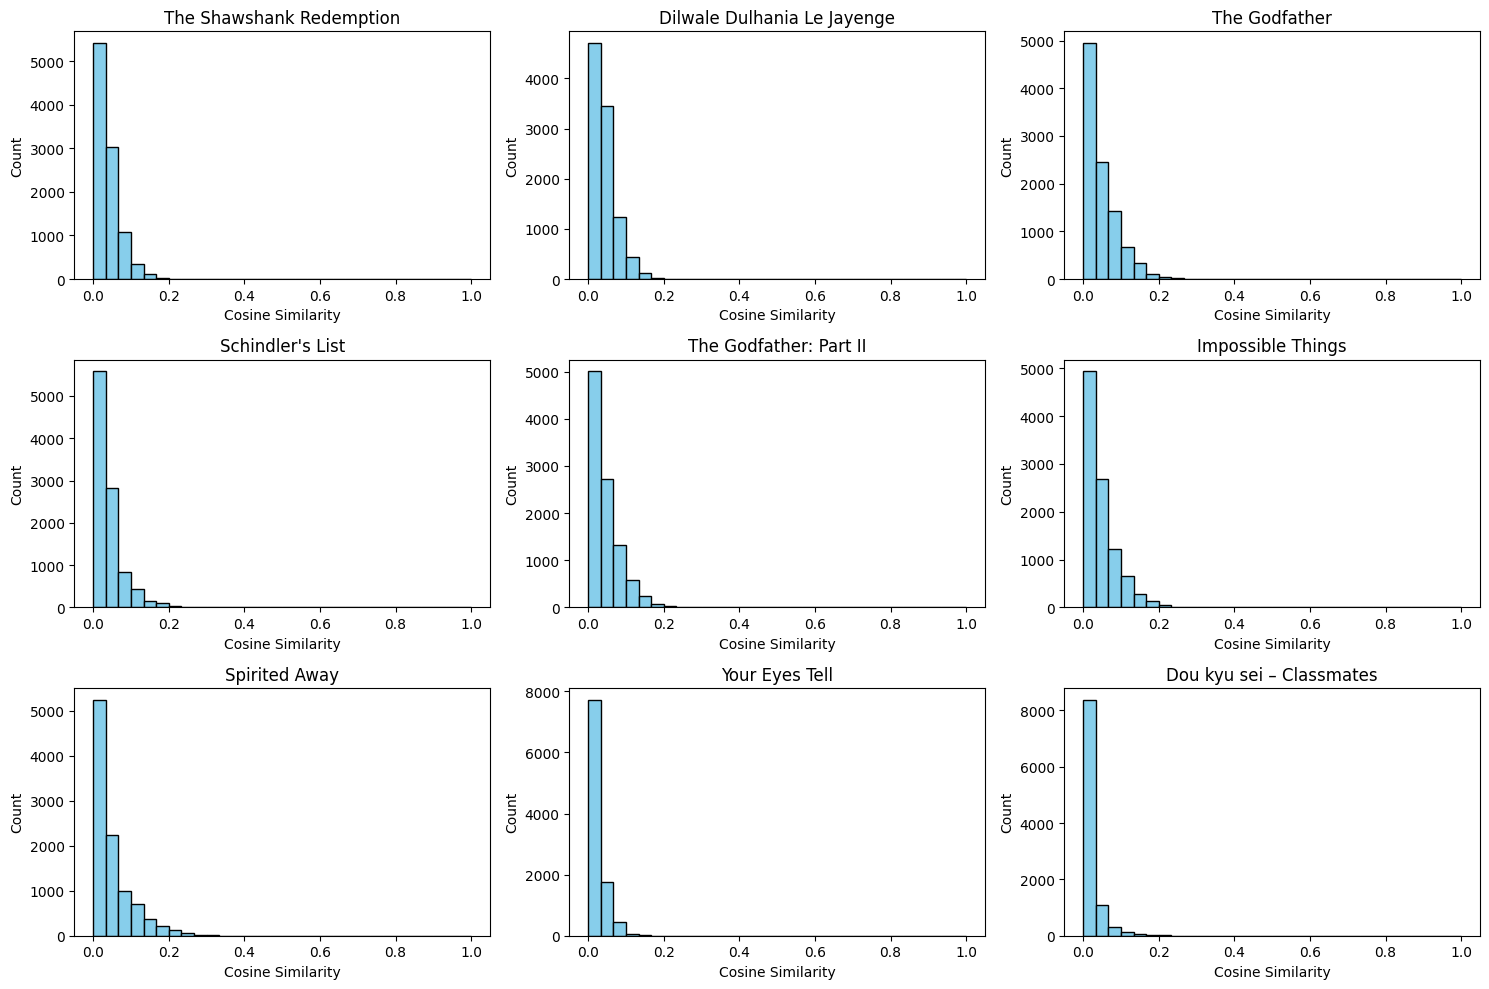

In [11]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # 3x3 grid

for i, ax in enumerate(axes.flatten()):
    ax.hist(similarity[i], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f"{movies.iloc[i].title}")
    ax.set_xlabel("Cosine Similarity")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

## The above chart shows us that as the cosine similarity increses the number of films decreases exponentially which means it is a good indicator o

In [16]:
movies[movies["title"] == "The Godfather"].index[0]
distance = sorted(list(enumerate(similarity[2])), reverse=True, key= lambda vector:vector[1])
for i in distance[1:6]:
    print(movies.iloc[i[0]].title)

The Godfather: Part II
Felon
House of Gucci
Gotti
The Outsider


In [14]:
#making a function to make it easy

def suggest(movie):
    a = movies[movies["title"] == movie].index[0]
    distance_alpha = sorted(list(enumerate(similarity[a])), reverse=True, key= lambda vector:vector[1])
    for i in distance_alpha[1:6]:
        print(movies.iloc[i[0]].title)

In [15]:
suggest('Inception')

24 Hours to Live
A-X-L
Transformers: Revenge of the Fallen
Suicide Squad: Hell to Pay
Flatliners


In [20]:
import pickle
pickle.dump(movies, open("movie_list.pkl", "wb"))
pickle.dump(similarity, open("similarity.pkl", "wb"))
pickle.load(open("similarity.pkl", "rb"))

array([[1.        , 0.06253054, 0.05802589, ..., 0.07963978, 0.07597372,
        0.03798686],
       [0.06253054, 1.        , 0.08980265, ..., 0.        , 0.        ,
        0.        ],
       [0.05802589, 0.08980265, 1.        , ..., 0.02541643, 0.03636965,
        0.        ],
       ...,
       [0.07963978, 0.        , 0.02541643, ..., 1.        , 0.03327792,
        0.03327792],
       [0.07597372, 0.        , 0.03636965, ..., 0.03327792, 1.        ,
        0.04761905],
       [0.03798686, 0.        , 0.        , ..., 0.03327792, 0.04761905,
        1.        ]], shape=(10000, 10000))